In [1]:
import pandas as pd
data = pd.read_csv("data.csv")
len(data)

13824

In [2]:
data.head()

,Unnamed: 0,participant_str,participant_num,condition,onset,duration,gain,loss,RT,participant_response,ordinal_response
0,257,sub-002,2,Equal range,4.051,4,5,11,3.015,weakly_accept,3.0
1,258,sub-002,2,Equal range,9.733,4,20,9,1.975,strongly_accept,4.0
2,259,sub-002,2,Equal range,14.835,4,8,13,1.870,weakly_reject,2.0
3,260,sub-002,2,Equal range,21.836,4,14,9,2.392,weakly_accept,3.0
4,261,sub-002,2,Equal range,27.333,4,8,18,1.874,strongly_reject,1.0


In [3]:
# remove trials where RT less than 250 ms
dataNonZeroRT = data[data['RT'] > 0.25]
print(len(dataNonZeroRT))

13716


In [4]:
# remove the data of subject 56 (mentioned in the paper; seems to have reversed accept and reject)
dataNonZeroRTExcludeSub56 = dataNonZeroRT[dataNonZeroRT['participant_num'] != 56]
print(len(dataNonZeroRTExcludeSub56))

13460


In [5]:
dataNonZeroRTExcludeSub56.head()

,Unnamed: 0,participant_str,participant_num,condition,onset,duration,gain,loss,RT,participant_response,ordinal_response
0,257,sub-002,2,Equal range,4.051,4,5,11,3.015,weakly_accept,3.0
1,258,sub-002,2,Equal range,9.733,4,20,9,1.975,strongly_accept,4.0
2,259,sub-002,2,Equal range,14.835,4,8,13,1.870,weakly_reject,2.0
3,260,sub-002,2,Equal range,21.836,4,14,9,2.392,weakly_accept,3.0
4,261,sub-002,2,Equal range,27.333,4,8,18,1.874,strongly_reject,1.0


In [6]:
# collapse participant choices into accept and reject
cleanedDataWithChoicesCollapsed = dataNonZeroRTExcludeSub56.copy()
cleanedDataWithChoicesCollapsed['response'] = dataNonZeroRTExcludeSub56['ordinal_response']
cleanedDataWithChoicesCollapsed['response'][dataNonZeroRTExcludeSub56['ordinal_response'] == 1] = 0
cleanedDataWithChoicesCollapsed['response'][dataNonZeroRTExcludeSub56['ordinal_response'] == 2] = 0
cleanedDataWithChoicesCollapsed['response'][dataNonZeroRTExcludeSub56['ordinal_response'] == 3] = 1
cleanedDataWithChoicesCollapsed['response'][dataNonZeroRTExcludeSub56['ordinal_response'] == 4] = 1
cleanedDataWithChoicesCollapsed.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/

,Unnamed: 0,participant_str,participant_num,condition,onset,duration,gain,loss,RT,participant_response,ordinal_response,response
0,257,sub-002,2,Equal range,4.051,4,5,11,3.015,weakly_accept,3.0,1.0
1,258,sub-002,2,Equal range,9.733,4,20,9,1.975,strongly_accept,4.0,1.0
2,259,sub-002,2,Equal range,14.835,4,8,13,1.870,weakly_reject,2.0,0.0
3,260,sub-002,2,Equal range,21.836,4,14,9,2.392,weakly_accept,3.0,1.0
4,261,sub-002,2,Equal range,27.333,4,8,18,1.874,strongly_reject,1.0,0.0


In [7]:
# select required fields and change name for compatibility with HDDM
finalData = cleanedDataWithChoicesCollapsed[['participant_num', 'gain', 'loss', 'RT', 'response']]
finalData.rename(columns = {'participant_num':'subj_idx', 'RT': 'rt'}, inplace = True) 
finalData['loss'] = finalData['loss'] * -1
finalData = finalData[['subj_idx', 'response', 'rt', 'gain', 'loss']]
finalData.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,subj_idx,response,rt,gain,loss
0,2,1.0,3.015,5,-11
1,2,1.0,1.975,20,-9
2,2,0.0,1.870,8,-13
3,2,1.0,2.392,14,-9
4,2,0.0,1.874,8,-18


In [9]:
finalData.to_csv("data_preprocessed.csv")

In [14]:
from scipy.stats import zscore
finalDataArray = np.array(finalData)

def getTrials(gain, loss, choice):
    trialsGain = finalDataArray[finalDataArray[:, 3] == gain]
    trialsLoss = trialsGain[trialsGain[:, 4] == loss]
    trialsChoice = trialsLoss[trialsLoss[:, 1] == choice]
    
    return trialsChoice

def getCleanedTrialsZScore(gain, loss, choice):
    print(gain, loss, choice)
    trials = getTrials(gain, loss, choice)
    reactionTimes = trials[:, 2]
    zScores = np.abs(zscore(reactionTimes))
    cleanedTrials = trials[zScores < 3]
    
    return cleanedTrials

In [15]:
import numpy as np

allStakes = np.unique(finalDataArray[:, -2:], axis=0)

allZScoreCleanedTrials = [getCleanedTrialsZScore(*stakes, choice) for stakes in allStakes for choice in range(0, 2)]
allZScoreCleanedTrialsArray = np.vstack(allZScoreCleanedTrials)
print(np.shape(allZScoreCleanedTrialsArray))

5.0 -20.0 0
5.0 -20.0 1
5.0 -19.0 0
5.0 -19.0 1
5.0 -18.0 0
5.0 -18.0 1
5.0 -17.0 0
5.0 -17.0 1
5.0 -16.0 0
5.0 -16.0 1
5.0 -15.0 0
5.0 -15.0 1
5.0 -14.0 0
5.0 -14.0 1
5.0 -13.0 0
5.0 -13.0 1
5.0 -12.0 0
5.0 -12.0 1
5.0 -11.0 0
5.0 -11.0 1
5.0 -10.0 0
5.0 -10.0 1
5.0 -9.0 0
5.0 -9.0 1
5.0 -8.0 0
5.0 -8.0 1
5.0 -7.0 0
5.0 -7.0 1
5.0 -6.0 0
5.0 -6.0 1
5.0 -5.0 0
5.0 -5.0 1
6.0 -20.0 0
6.0 -20.0 1
6.0 -19.0 0
6.0 -19.0 1
6.0 -18.0 0
6.0 -18.0 1
6.0 -17.0 0
6.0 -17.0 1
6.0 -16.0 0
6.0 -16.0 1
6.0 -15.0 0
6.0 -15.0 1
6.0 -14.0 0
6.0 -14.0 1
6.0 -13.0 0
6.0 -13.0 1
6.0 -12.0 0
6.0 -12.0 1
6.0 -11.0 0
6.0 -11.0 1
6.0 -10.0 0
6.0 -10.0 1
6.0 -9.0 0
6.0 -9.0 1
6.0 -8.0 0
6.0 -8.0 1
6.0 -7.0 0
6.0 -7.0 1
6.0 -6.0 0
6.0 -6.0 1
6.0 -5.0 0
6.0 -5.0 1
7.0 -20.0 0
7.0 -20.0 1
7.0 -19.0 0
7.0 -19.0 1
7.0 -18.0 0
7.0 -18.0 1
7.0 -17.0 0
7.0 -17.0 1
7.0 -16.0 0
7.0 -16.0 1
7.0 -15.0 0
7.0 -15.0 1
7.0 -14.0 0
7.0 -14.0 1
7.0 -13.0 0
7.0 -13.0 1
7.0 -12.0 0
7.0 -12.0 1
7.0 -11.0 0
7.0 -11.0 1
7.0 -10.0 0


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:2309: RuntimeWarning: Mean of empty slice.
  mns = a.mean(axis=axis)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Pyt

12.0 -17.0 0
12.0 -17.0 1
12.0 -16.0 0
12.0 -16.0 1
12.0 -15.0 0
12.0 -15.0 1
12.0 -14.0 0
12.0 -14.0 1
12.0 -13.0 0
12.0 -13.0 1
12.0 -12.0 0
12.0 -12.0 1
12.0 -11.0 0
12.0 -11.0 1
12.0 -10.0 0
12.0 -10.0 1
12.0 -9.0 0
12.0 -9.0 1
12.0 -8.0 0
12.0 -8.0 1
12.0 -7.0 0
12.0 -7.0 1
12.0 -6.0 0
12.0 -6.0 1
12.0 -5.0 0
12.0 -5.0 1
13.0 -20.0 0
13.0 -20.0 1
13.0 -19.0 0
13.0 -19.0 1
13.0 -18.0 0
13.0 -18.0 1
13.0 -17.0 0
13.0 -17.0 1
13.0 -16.0 0
13.0 -16.0 1
13.0 -15.0 0
13.0 -15.0 1
13.0 -14.0 0
13.0 -14.0 1
13.0 -13.0 0
13.0 -13.0 1
13.0 -12.0 0
13.0 -12.0 1
13.0 -11.0 0
13.0 -11.0 1
13.0 -10.0 0
13.0 -10.0 1
13.0 -9.0 0
13.0 -9.0 1
13.0 -8.0 0
13.0 -8.0 1
13.0 -7.0 0
13.0 -7.0 1
13.0 -6.0 0
13.0 -6.0 1
13.0 -5.0 0
13.0 -5.0 1
14.0 -20.0 0
14.0 -20.0 1
14.0 -19.0 0
14.0 -19.0 1
14.0 -18.0 0
14.0 -18.0 1
14.0 -17.0 0
14.0 -17.0 1
14.0 -16.0 0
14.0 -16.0 1
14.0 -15.0 0
14.0 -15.0 1
14.0 -14.0 0
14.0 -14.0 1
14.0 -13.0 0
14.0 -13.0 1
14.0 -12.0 0
14.0 -12.0 1
14.0 -11.0 0
14.0 -11.0 1
14.0 -

In [17]:
np.savetxt("data_preprocessed_250_zScore3.csv", allZScoreCleanedTrialsArray, delimiter=",")

In [19]:
RTs = allZScoreCleanedTrialsArray[:, 2]

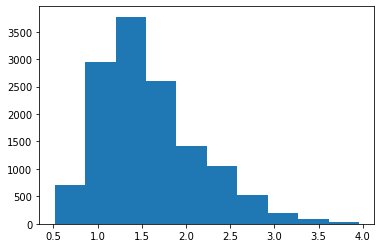

In [21]:
from matplotlib import pyplot as plt
plt.hist(RTs)
plt.show()